In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
library(plyr)
library(purrr)
library(rstatix)
library(ggpubr)
library(ggrepel)


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



Attaching package: ‘purrr’


The following object is masked from ‘package:plyr’:

    compact



Attaching package: ‘rstatix’


The following objects are masked from ‘package:plyr’:

    desc, mutate


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggplot2


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




In [2]:
df<-read.csv("05_HAI/HAI_Y2020-2021_Phuket.csv")

In [3]:
df <- df %>% dplyr::mutate(`Age Group` = case_when(
  cohort.cohortGuid == "BR1" ~ "Young",
  cohort.cohortGuid == "BR2" ~ "Older",
  TRUE ~ NA_character_
))
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

In [4]:
df$Group<-paste0(df$`Age Group`,'_',df$Flu_Day)
df$Group<-factor(df$Group,levels=c('Young_Day 0','Young_Day 7',
                                       'Older_Day 0','Older_Day 7'))

In [5]:
df<-df%>% filter(Assay=='B/Phuket')

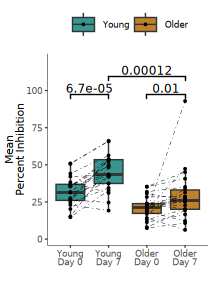

In [6]:
options(repr.plot.width = 45/25.4, repr.plot.height = 60/25.4)


p<-ggplot(df %>% arrange(subject.subjectGuid,Flu_Day), aes(x=Group, y=Mean_Perc_Inhib, fill=`Age Group`)) +
   geom_boxplot(outlier.shape = NA,lwd=0.3) +
geom_point(color="black", size=0.8,stroke=0) +
theme_classic(base_size=6)+  
stat_compare_means( label = "p.format",method='wilcox.test',paired=TRUE,size=2.5,
  comparisons = list(c("Older_Day 0", "Older_Day 7")))+  
stat_compare_means( label = "p.format",method='wilcox.test',paired=TRUE,size=2.5,
  comparisons = list(c("Young_Day 0", "Young_Day 7")))+  
stat_compare_means( label = "p.format",method='wilcox.test',paired=FALSE,size=2.5,label.y=105,
  comparisons = list(c("Older_Day 7", "Young_Day 7")))+  
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+
    scale_y_continuous(limits = c(NA, NA),
                       expand = expansion(mult = c(0.1, 0.15)))+
theme(legend.position="none")+
xlab('')+
ylab('Mean\nPercent Inhibition')+theme(
panel.border = element_blank())   + 
scale_x_discrete(labels = c("Older_Day 0" = "Older\nDay 0", 
                              "Older_Day 7" = "Older\nDay 7",
                              "Young_Day 0" = "Young\nDay 0",
                              "Young_Day 7" = "Young\nDay 7")) +
    theme(axis.line = element_line(colour = "black", linewidth = 0.1),
          legend.position = "top",
          legend.title = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          strip.background = element_rect(linewidth = 0),
          axis.title.x = element_text(margin = margin(t = 1)))+
     geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)),
              color = "black", 
              linewidth=0.1, 
              linetype =4)
p
ggsave('FigureM.pdf',p,width = 45/25.4,height = 60/25.4)